In [207]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [208]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [209]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [211]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


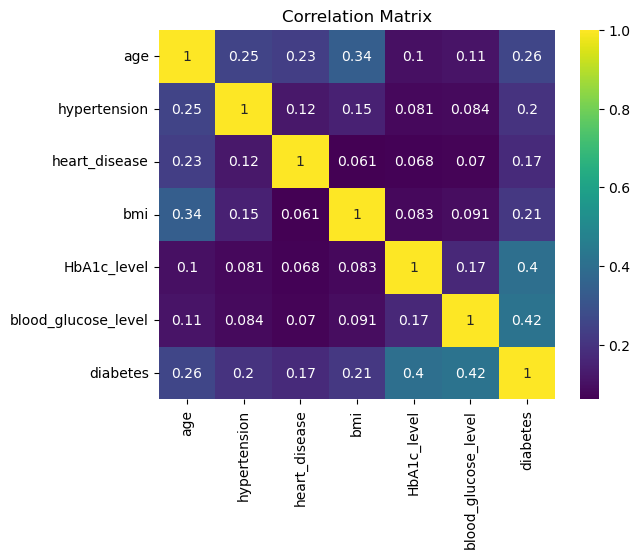

In [212]:
corr_mat = df.corr(numeric_only = True)
sns.heatmap(corr_mat, annot = True, cmap = 'viridis');
plt.title("Correlation Matrix")
plt.show();

In [213]:
cols = df.columns

In [214]:
cols = list(cols)

In [215]:
for col in cols:
    if(df[col].dtype==object):
        cols.remove(col)

In [216]:
cols

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

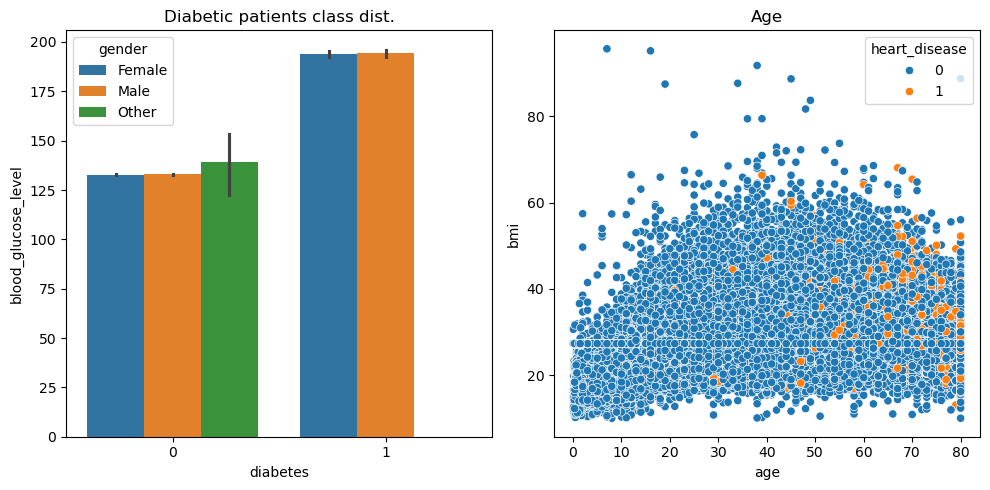

In [217]:
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.barplot(df, x = 'diabetes', y = 'blood_glucose_level', hue  = 'gender');
plt.title("Diabetic patients class dist.")

plt.subplot(1,2,2)
sns.scatterplot(df, x ='age', y = 'bmi', hue = 'heart_disease');
plt.title('Age');
plt.tight_layout();
plt.show();

In [218]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [219]:
import tensorflow as tf

In [220]:
print(tf.__version__)

2.10.0


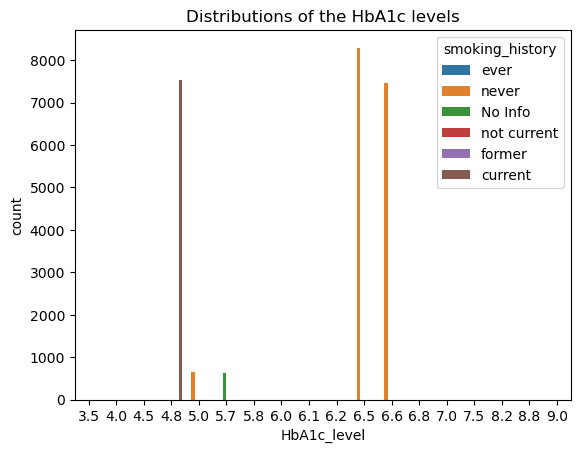

In [221]:
sns.barplot(data = df, hue = 'smoking_history',x = 'HbA1c_level',y= df['HbA1c_level'].value_counts().sort_values(ascending = False))
plt.title('Distributions of the HbA1c levels');
plt.show();

In [222]:
len(df)

100000

In [223]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [224]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pickle 

In [225]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [226]:
print("The data set has around ",len(df[df['diabetes']==0])/len(df)*100,"% of class 0 and ", len(df[df['diabetes']==1])/len(df)*100,"% of 1.")

The data set has around  91.5 % of class 0 and  8.5 % of 1.


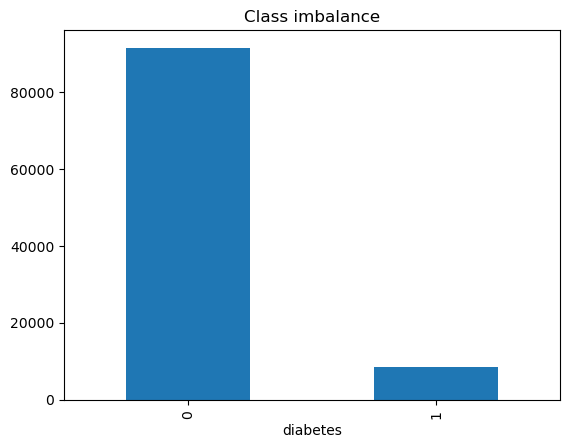

In [227]:
df['diabetes'].value_counts().plot(kind = 'bar');
plt.title("Class imbalance");

We can perform oversmapling on the dataset to deal with imbalance. 

In [228]:
import imblearn
from imblearn.combine import SMOTETomek

The above uses a combination of over sampling and undersampling, undersampling reduces the instances of the dataset and is used with a dataset with over 1 million instances. 

### Data Preprocessing

In [229]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [230]:
cat_vars = []
for col in df.columns:
    if df[col].dtype == object:
        cat_vars.append(col)

In [231]:
cat_vars

['gender', 'smoking_history']

In [232]:
le_encoder_geneder = LabelEncoder()
df['gender'] = le_encoder_geneder.fit_transform(df['gender'])

In [233]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


In [234]:
smoking_le = LabelEncoder()
df['smoking_history'] = smoking_le.fit_transform(df['smoking_history'])

In [235]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


Saving the encoders...

In [236]:
genders = ['Male', 'Female', 'Other']
smoking_history = ['ever', 'never', 'No info', 'not current', 'former', 'current']

In [237]:
with open('label_encoder_gender.pkl', 'wb') as file:
    pickle.dump(le_encoder_geneder, file)

with open('label_encoder_smoking_history.pkl', 'wb') as file:
    pickle.dump(smoking_le, file)

In [238]:
from sklearn.model_selection import train_test_split

In [239]:
X = df.drop('diabetes', axis = 1)
y = df['diabetes']

In [240]:
smk = SMOTETomek(random_state = 42)
X_res, y_res = smk.fit_resample(X,y)

In [241]:
X_res.shape, y_res.shape, X.shape, y.shape

((182300, 8), (182300,), (100000, 8), (100000,))

<Axes: xlabel='diabetes', ylabel='Count'>

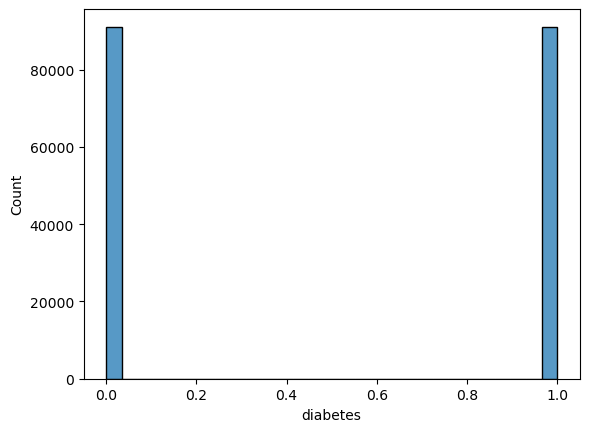

In [242]:
sns.histplot(x = y_res)

In [243]:
X_res.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155


In [244]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size = 0.2, random_state = 42)

In [245]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
124739,0,79.101510,1,0,4,27.354513,6.469547,260
116226,0,57.968426,0,0,0,32.974740,6.015787,220
26059,1,62.000000,1,0,0,30.620000,4.800000,126
10380,0,75.000000,1,0,0,22.590000,8.800000,140
162215,0,64.000000,0,0,4,33.535466,6.138866,240


In [246]:
y_train.head()

124739    1
116226    1
26059     0
10380     1
162215    1
Name: diabetes, dtype: int64

In [247]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [248]:
X_train[:2]

array([[-0.72891825,  1.32285039,  3.49481553, -0.19984735,  0.94750916,
        -0.27998137,  0.26857741,  1.69104262],
       [-0.72891825,  0.34213617, -0.28613814, -0.19984735, -1.33946566,
         0.48749304, -0.10340026,  0.98982251]])

In [249]:
X_test[:2]

array([[-0.72891825,  0.52548784, -0.28613814, -0.19984735,  0.94750916,
         1.23714758, -0.35566591, -0.07953817],
       [ 1.37065194, -0.42051122, -0.28613814, -0.19984735,  0.94750916,
        -0.403428  ,  1.37803495,  0.98982251]])

In [250]:
X_train.shape

(145840, 8)

In [251]:
with open('standard_scaler.pkl', 'wb') as file:
    pickle.dump(sc, file)

In [252]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import datetime

### Modelling

In [253]:
model_0 = Sequential([
    Dense(64,activation = 'relu',input_shape = (X_train.shape[1],)),
    Dropout(0.2),
    Dense(32,activation = 'relu'),
    Dropout(0.2),
    Dense(1, activation = 'sigmoid')
])

In [254]:
model_0.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                576       
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [255]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(0.01)

In [256]:
model_0.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy', tensorflow.keras.metrics.Recall(), tensorflow.keras.metrics.Precision()])

In [257]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 0.00001, restore_best_weights=True)

In [258]:
history = model_0.fit(X_train, y_train, validation_data = (X_test, y_test),
                     epochs = 100,
                     callbacks = early_stopping_callback)

Epoch 1/100
4558/4558 [==============================] - 23s 4ms/step - loss: 0.2016 - accuracy: 0.9034 - recall_4: 0.9199 - precision_4: 0.8905 - val_loss: 0.1832 - val_accuracy: 0.9104 - val_recall_4: 0.9266 - val_precision_4: 0.8979
Epoch 2/100
4558/4558 [==============================] - 19s 4ms/step - loss: 0.1886 - accuracy: 0.9084 - recall_4: 0.9237 - precision_4: 0.8961 - val_loss: 0.1779 - val_accuracy: 0.9117 - val_recall_4: 0.9387 - val_precision_4: 0.8908
Epoch 3/100
4558/4558 [==============================] - 18s 4ms/step - loss: 0.1856 - accuracy: 0.9112 - recall_4: 0.9264 - precision_4: 0.8989 - val_loss: 0.1822 - val_accuracy: 0.9125 - val_recall_4: 0.9356 - val_precision_4: 0.8946


In [259]:
history

In [260]:
df_history = pd.DataFrame(history.history)

In [261]:
df_history

,loss,accuracy,recall_4,precision_4,val_loss,val_accuracy,val_recall_4,val_precision_4
0,0.201582,0.903449,0.919925,0.890492,0.183179,0.910422,0.926593,0.897889
1,0.188582,0.908372,0.923740,0.896112,0.177917,0.911657,0.938745,0.890811
2,0.185640,0.911170,0.926429,0.898912,0.182201,0.912479,0.935570,0.894583


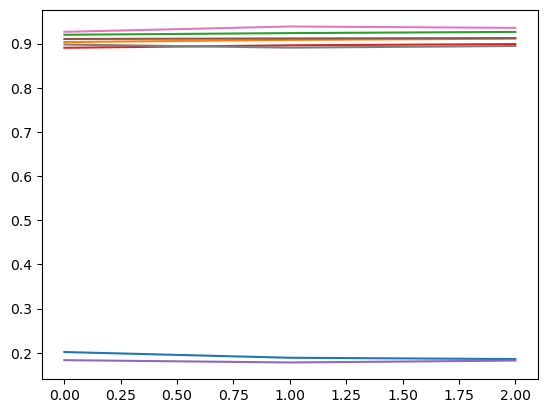

In [262]:
plt.plot(df_history);

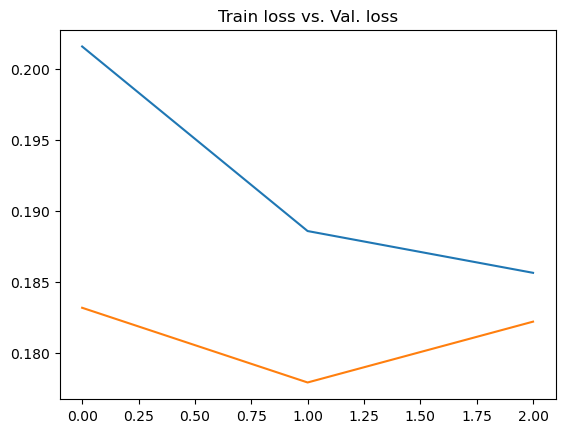

In [263]:
plt.plot(df_history['loss']);
plt.plot(df_history['val_loss']);
plt.title("Train loss vs. Val. loss")
plt.show();

In [264]:
model_0.save('model_0.h5')

### Loading the files

In [265]:
from tensorflow.keras.models import load_model

In [266]:
model_1 = load_model('model_0.h5')

In [267]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                576       
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [268]:
with open('label_encoder_gender.pkl','rb') as file:
    label_encoder_gender = pickle.load(file)

In [269]:
label_encoder_gender

LabelEncoder()

In [270]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


### Sample inputs for the model

In [271]:
input_data = {
    'gender': 0,
    'age': 80.0,
    'hypertension': 0,
    'heart_disease': 1,
    'smoking_history': 4,
    'bmi': 25.19,
    'HbA1c_level': 6.6,
    'blood_glucose_level': 140,
    'diabetes': 0
}

In [272]:
sample_df = pd.DataFrame([input_data])

In [273]:
sample_df = sample_df.drop('diabetes', axis = 1)

In [274]:
model_1.predict(sample_df)

1/1 [==============================] - 0s 200ms/step


array([[1.]], dtype=float32)

In [275]:
y_preds = np.round(model_1.predict(X_test))

1140/1140 [==============================] - 3s 2ms/step


In [276]:
y_preds[:10]

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [277]:
y_test

141584    1
130633    1
176768    1
80858     0
126970    1
         ..
92293     0
75654     0
116589    1
98526     0
11280     0
Name: diabetes, Length: 36460, dtype: int64

In [278]:
y_preds.shape, y_test.shape

((36460, 1), (36460,))

In [279]:
y_preds = np.ndarray.flatten(y_preds)

In [280]:
y_preds.shape, y_test.shape

((36460,), (36460,))

In [281]:
round(sum(y_preds==y_test)/len(y_test)*100,2)

91.17

In [282]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [283]:
label_encoder_gender

LabelEncoder()